In [35]:
from random import seed, randint;

seed(5); print(5)
print([randint(0, 10) for i in range(5)])
print([randint(0, 10) for i in range(5)])
print([randint(0, 10) for i in range(5)])
seed(7); print(7)
print([randint(0, 10) for i in range(5)])
seed(5), print(5)
print([randint(0, 10) for i in range(5)])
# seed(5)
print([randint(0, 10) for i in range(5)])

5
[9, 4, 5, 10, 8]
[0, 7, 3, 10, 0]
[2, 1, 5, 7, 3]
7
[5, 2, 6, 10, 0]
5
[9, 4, 5, 10, 8]
[0, 7, 3, 10, 0]


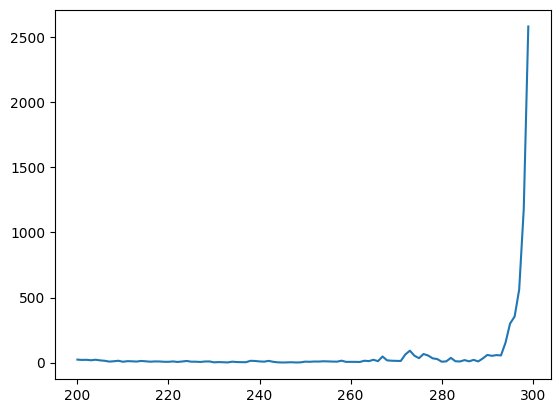

In [20]:
import pickle
with open("dataset_cache/flunet_x7_y1_w7_s2_m80.bin", "rb") as f: data = pickle.load(f)
lis = data['data']['h1n1'][1]
y = lis[1][:, 0]

import matplotlib.pyplot as plt

i = 200
_y = y[i:min(i+100, len(y))]

plt.plot(range(len(y))[i:min(i+100, len(y))], _y)



In [15]:
import re, math
def semi(res, num_works_per_device=2):
    # 同一个device串行执行几个程序

    grouped_commands = {}
    for command in res.split("\n"):
        if command == '': continue
        device = re.search(r"device (.*)", command).groups()[0]
        
        if device in grouped_commands:
            grouped_commands[device].append(command)
        else:
            grouped_commands[device] = [command]

    # 2. 对每个分组进行处理
    semicolon_joined_commands = []
    for device, device_commands in grouped_commands.items():
        works = math.ceil(len(device_commands) / num_works_per_device)
        for i in range(0, len(device_commands), works):
            semicolon_joined_commands.append("; ".join(device_commands[i:i+works]))

    return '\n' * 2 + '\n'.join(semicolon_joined_commands) + '\n' * 2

In [35]:
a = '''python main.py --dataset flunet  --country h3n2 --shift  2 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 1
python main.py --dataset flunet  --country BV --shift  2 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_80   --node-observed-ratio 80 --model mpnn_lstm --maml --device 1
python main.py --dataset flunet  --country BY --shift  6 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 1
python main.py --dataset flunet  --country h1n1 --shift  2 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 1
python main.py --dataset flunet  --country h3n2 --shift  2 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_80   --node-observed-ratio 80 --model mpnn_lstm --maml --device 3
python main.py --dataset flunet  --country BV --shift  6 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 3
python main.py --dataset flunet  --country BY --shift  6 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_80   --node-observed-ratio 80 --model mpnn_lstm --maml --device 3
python main.py --dataset flunet  --country h1n1 --shift  2 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_80   --node-observed-ratio 80 --model mpnn_lstm --maml --device 3
python main.py --dataset flunet  --country h3n2 --shift  6 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 4
python main.py --dataset flunet  --country BV --shift  6 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_80   --node-observed-ratio 80 --model mpnn_lstm --maml --device 4
python main.py --dataset flunet  --country BY --shift 13 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 4
python main.py --dataset flunet  --country h1n1 --shift  6 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 4
python main.py --dataset flunet  --country h3n2 --shift  6 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_80   --node-observed-ratio 80 --model mpnn_lstm --maml --device 7
python main.py --dataset flunet  --country BV --shift 13 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 7
python main.py --dataset flunet  --country BY --shift 13 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_80   --node-observed-ratio 80 --model mpnn_lstm --maml --device 7
python main.py --dataset flunet  --country h1n1 --shift  6 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_80   --node-observed-ratio 80 --model mpnn_lstm --maml --device 7
python main.py --dataset flunet  --country h3n2 --shift 13 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 8
python main.py --dataset flunet  --country BV --shift 13 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_80   --node-observed-ratio 80 --model mpnn_lstm --maml --device 8
python main.py --dataset flunet  --country h1n1 --shift 13 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 8
python main.py --dataset flunet  --country h3n2 --shift 13 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_80   --node-observed-ratio 80 --model mpnn_lstm --maml --device 8
python main.py --dataset flunet  --country BY --shift  2 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 9
python main.py --dataset flunet  --country h1n1 --shift 13 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_80   --node-observed-ratio 80 --model mpnn_lstm --maml --device 9
python main.py --dataset flunet  --country BV --shift  2 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 9
python main.py --dataset flunet  --country BY --shift  2 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_80   --node-observed-ratio 80 --model mpnn_lstm --maml --device 9'''

print(semi(a, 3))
# print('\n'.join(res))



python main.py --dataset flunet  --country h3n2 --shift  2 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 1; python main.py --dataset flunet  --country BV --shift  2 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_80   --node-observed-ratio 80 --model mpnn_lstm --maml --device 1
python main.py --dataset flunet  --country BY --shift  6 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 1; python main.py --dataset flunet  --country h1n1 --shift  2 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_50   --node-observed-ratio 50 --model mpnn_lstm --maml --device 1
python main.py --dataset flunet  --country h3n2 --shift  2 --result-dir tests_0201_all --exp 1_baselines_mpnn_tl_80   --node-observed-ratio 80 --model mpnn_lstm --maml --device 3; python main.py --dataset flunet  --country BV --shift  6 --result-dir tests_0201_all --exp 1_baselines_m

In [3]:
# 获取 best_results.zip 中的所有文件（不解压）

import zipfile
import os


with zipfile.ZipFile('best_results.zip', 'r') as z:
    for f in z.namelist():
        print(f, end=', ')

from best_results import paths

paths.o50


y3_EN_lstm.pth, y3_EN_mpnn_lstm.pth, y3_EN_mpnn_tl.pth, y3_EN_dynst.pth, y3_FR_lstm.pth, y3_FR_mpnn_lstm.pth, y3_FR_mpnn_tl.pth, y3_FR_dynst.pth, y3_IT_lstm.pth, y3_IT_mpnn_lstm.pth, y3_IT_mpnn_tl.pth, y3_IT_dynst.pth, y3_ES_lstm.pth, y3_ES_mpnn_lstm.pth, y3_ES_mpnn_tl.pth, y3_ES_dynst.pth, y3_NZ_lstm.pth, y3_NZ_mpnn_lstm.pth, y3_NZ_mpnn_tl.pth, y3_NZ_dynst.pth, y3_JP_lstm.pth, y3_JP_mpnn_lstm.pth, y3_JP_mpnn_tl.pth, y3_JP_dynst.pth, y7_EN_lstm.pth, y7_EN_mpnn_lstm.pth, y7_EN_mpnn_tl.pth, y7_EN_dynst.pth, y7_FR_lstm.pth, y7_FR_mpnn_lstm.pth, y7_FR_mpnn_tl.pth, y7_FR_dynst.pth, y7_IT_lstm.pth, y7_IT_mpnn_lstm.pth, y7_IT_mpnn_tl.pth, y7_IT_dynst.pth, y7_ES_lstm.pth, y7_ES_mpnn_lstm.pth, y7_ES_mpnn_tl.pth, y7_ES_dynst.pth, y7_NZ_lstm.pth, y7_NZ_mpnn_lstm.pth, y7_NZ_mpnn_tl.pth, y7_NZ_dynst.pth, y7_JP_lstm.pth, y7_JP_mpnn_lstm.pth, y7_JP_mpnn_tl.pth, y7_JP_dynst.pth, y14_EN_lstm.pth, y14_EN_mpnn_lstm.pth, y14_EN_mpnn_tl.pth, y14_EN_dynst.pth, y14_FR_lstm.pth, y14_FR_mpnn_lstm.pth, y14_FR_m

mae  \
y  country model                
3  EN      lstm         4.669   
           mpnn_lstm    5.077   
           mpnn_tl      5.032   
           dynst        4.523   
   FR      lstm         2.877   
...                       ...   
14 NZ      dynst       46.371   
   JP      lstm       258.199   
           mpnn_lstm  326.615   
           mpnn_tl    347.541   
           dynst      257.598   

                                                                   path  
y  country model                                                         
3  EN      lstm       results_2024/tests_1119/exp_7/dataforgood/lstm...  
           mpnn_lstm  results_2024/tests_1120/exp_1/dataforgood/mpnn...  
           mpnn_tl    results_2024/tests_1201/exp_1_mpnn_lstm_maml/d...  
           dynst      results/test_0106_all/exp_2_50_all/dataforgood...  
   FR      lstm       results_2024/tests_1120/exp_1/dataforgood/lstm...  
...                                                                 ...  
14 NZ      dynst      results_2024/tests_1210/exp_2_50_graph_lambda_...  
   JP      lstm       results/tests_0104_100days_seed2/exp_1_baselin...  
           mpnn_lstm  results/tests_0104_100days_seed2/exp_1_baselin...  
           mpnn_tl    results/tests_0104_100days_seed2/exp_1_baselin...  
           dynst      results/test_0106_all/exp_2_50_all/japan/dynst...  

[72 rows x 2 columns]

In [ ]:
import sys
import os
import re

from utils.test import test

data = paths.o50.iloc[0]

# 显示压缩目录中的文件列表
with zipfile.ZipFile('best_results.zip', 'r') as z:
    for f in z.namelist():
        y, country, model = re.search(r"y(.*?)_(.*?)_(.*)\.pth", f).groups()
        target_path = paths.o50.loc[(int(y), country, model)].path
        os.makedirs(os.path.dirname(target_path), exist_ok=True)
        # 将 f 解压到 target_path
        z.extract(f, target_path)

y3_EN_lstm.pth ] <---> [ results_2024/tests_1119/exp_7/dataforgood/lstm_7_1_w7_s2_20241119165850/model_EN_best.pth
y3_EN_mpnn_lstm.pth ] <---> [ results_2024/tests_1120/exp_1/dataforgood/mpnn_lstm_7_1_w7_s2_20241120193339/model_EN_best.pth
y3_EN_mpnn_tl.pth ] <---> [ results_2024/tests_1201/exp_1_mpnn_lstm_maml/dataforgood/mpnn_lstm_7_1_w7_s2_20241201125738/model_EN_best.pth
y3_EN_dynst.pth ] <---> [ results/test_0106_all/exp_2_50_all/dataforgood/dynst_7_1_w7_s2_20250106163802/model_EN_best.pth
y3_FR_lstm.pth ] <---> [ results_2024/tests_1120/exp_1/dataforgood/lstm_7_1_w7_s2_20241120194051/model_FR_best.pth
y3_FR_mpnn_lstm.pth ] <---> [ results_2024/tests_1120/exp_1/dataforgood/mpnn_lstm_7_1_w7_s2_20241120193932/model_FR_best.pth
y3_FR_mpnn_tl.pth ] <---> [ results_2024/tests_1128_maml/exp_1_mpnn_lstm_maml/dataforgood/mpnn_lstm_7_1_w7_s2_20241128214840/model_FR_best.pth
y3_FR_dynst.pth ] <---> [ results/test_0106_all/exp_2_50_all/dataforgood/dynst_7_1_w7_s2_20250106163802/model_FR_best